# Sampling

## Population Inference

The mayor's office has hired Flatiron Data Science Immersive students to determine a way to fix traffic congestion. A good starting point is to determine what proportion of the population of Atlanta owns a car.

In order for us to make any determinations about a population, we must first get information about it.

Because it's impractical to get data about *everyone* in a population, we take a sample.

Our sample should be:

* Randomly selected- every item should have an *equal* chance of being selected
* Representative of our population

![pop](./img/sample_pop.png)

**Random sampling is not easy to do, let's look at an example:**

Imagine you are trying to determine the proportion of people in metro Atlanta that own a car.

* Stand outside of Flatiron at 12 pm and ask random people until *n* responses


* Go to a randomly assigned street corner and at a random time and ask *n* people if they own a car



When we gather a sample, we are trying to minimize the bias of our sample while also minimizing our cost.

##### Population v Sample Terminology
Measurable characteristics of populations are called *parameters*

Measurable characteristics of a sample are called *statistics*

![imgsample](./img/sample_stats.png)

## Central Limit Theorem

If we take repeated samples of a population, the sampling distribution of **sample means** will approximate to a normal distribution! 

## $E(\bar{x_{n}}) = \mu$

as n --> "large"

[good D3 example](https://seeing-theory.brown.edu/probability-distributions/index.html)

[good video demonstration](https://www.youtube.com/watch?v=jvoxEYmQHNM)


### An Example
A bicycle advocacy group has come to us to see if it would make sense to increase the length of time users of Capital Bike Share have to ride on their bikes before they have to return them. Let's analyze a collection of Capital Bike Share data to determine if we should lengthen the time people have with their bikes.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('data/201904-capitalbikeshare-tripdata.csv')

In [13]:
df.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,313,2019-04-01 00:03:03,2019-04-01 00:08:16,31618,4th & East Capitol St NE,31630,15th & East Capitol St NE,W24063,Member
1,453,2019-04-01 00:07:37,2019-04-01 00:15:10,31119,14th & Belmont St NW,31298,15th & M St NW,W22080,Member
2,333,2019-04-01 00:09:31,2019-04-01 00:15:05,31203,14th & Rhode Island Ave NW,31519,1st & O St NW,W00276,Member
3,568,2019-04-01 00:10:20,2019-04-01 00:19:49,31202,14th & R St NW,31103,16th & Harvard St NW,W21582,Member
4,1609,2019-04-01 00:10:38,2019-04-01 00:37:28,31517,Union Market,31655,New Jersey Ave & F St NW,75558,Member


In [14]:
trip_durations = df['Duration']/60
#trip_durations = trip_durations[trip_durations < 2*60]
trip_durations

0           5.216667
1           7.550000
2           5.550000
3           9.466667
4          26.816667
5           5.933333
6           4.066667
7          19.266667
8           3.050000
9           5.366667
10         22.150000
11         12.416667
12         13.966667
13          6.950000
14          6.766667
15          3.550000
16         23.316667
17          2.933333
18          9.866667
19          6.333333
20         22.700000
21          9.683333
22          7.666667
23          7.266667
24        747.916667
25        747.466667
26          6.983333
27          2.133333
28         23.483333
29          9.833333
             ...    
347962     25.483333
347963      7.066667
347964      2.216667
347965     20.500000
347966     13.700000
347967     10.750000
347968      5.050000
347969     15.833333
347970      2.483333
347971     21.750000
347972      5.250000
347973     13.083333
347974      4.033333
347975      2.633333
347976     29.933333
347977      9.266667
347978      9

#### The length of a bike ride is not normally distributed

#### Get population statistics

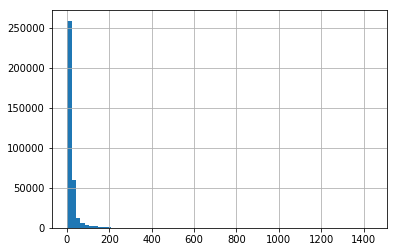

In [15]:
trip_durations.hist(bins=70)

In [16]:
pop_mean = trip_durations.mean()
pop_std = trip_durations.std()
print('pop_mean is {} \npop_std is {}'.format(pop_mean,pop_std))

pop_mean is 20.758011774216833 
pop_std is 41.51858806957617


#### When we take multiple samples from the distribution, and plot the means of each sample, the shape of the curve shifts.

![means](./img/meansofsamples.png)

#### The number of samples drives the shape of the curve more than the sample size itself

![moremeans](./img/moresamplescurve.png)

**Less samples**
![lesssamples](./img/lesssamplescurve.png)

### Let's confirm this ourselves!

In [17]:
import seaborn as sns
def central_limit_theorem_plotter(distribution, sample_size, num_samples):
    sample_means = np.zeros(num_samples)
    for idx, num in enumerate(range(num_samples)):
        sample = np.random.choice(distribution, size=sample_size, replace=True)
        sample_means[idx] = sample.mean()
    sns.distplot(sample_means, bins=50, kde=True)
    title = 'Sample Distribution n = {} and number of samples = {}, std error = {}'.format(
        sample_size, num_samples, pop_std/num_samples)
    print('mean = {}'.format(sample_means.mean()))
    plt.title(title)

mean = 20.893353499999996


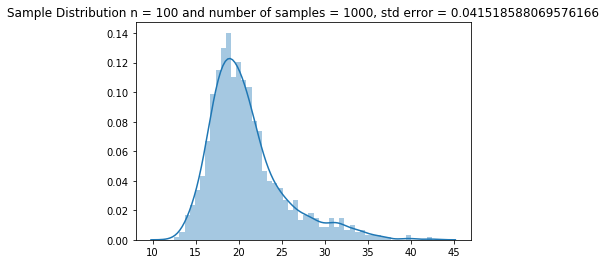

In [18]:
central_limit_theorem_plotter(trip_durations,100,1000);

mean = 21.2641


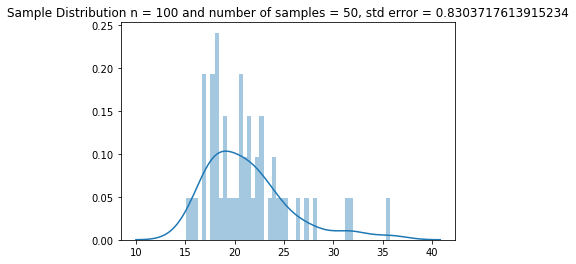

In [19]:
central_limit_theorem_plotter(trip_durations,100,50)

* What happens as we increase the sample size?
* How does the height of the distribution change? Why does it change?

### Show with exponential

In [9]:
exponential = np.random.exponential(scale=1, size=1000)

(array([126., 130.,  93.,  75.,  82.,  57.,  63.,  44.,  37.,  40.,  30.,
         22.,  23.,  23.,  20.,  16.,  14.,  17.,  10.,  14.,  13.,   8.,
          6.,   6.,   3.,   6.,   3.,   0.,   2.,   1.,   3.,   0.,   1.,
          3.,   1.,   1.,   2.,   1.,   0.,   1.,   1.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.64263404e-04, 1.38974523e-01, 2.77784782e-01, 4.16595042e-01,
        5.55405301e-01, 6.94215561e-01, 8.33025820e-01, 9.71836080e-01,
        1.11064634e+00, 1.24945660e+00, 1.38826686e+00, 1.52707712e+00,
        1.66588738e+00, 1.80469764e+00, 1.94350790e+00, 2.08231816e+00,
        2.22112841e+00, 2.35993867e+00, 2.49874893e+00, 2.63755919e+00,
        2.77636945e+00, 2.91517971e+00, 3.05398997e+00, 3.19280023e+00,
        3.33161049e+00, 3.47042075e+00, 3.60923101e+00, 3.74804127e+00,
        3.88685153e+00, 4.02566179e+00, 4.16447205e+00, 4.30328231e+00,
        4.44209257e+00, 4.58090283e+00, 4.71971309e+00, 4.85852334e+00,
        4.

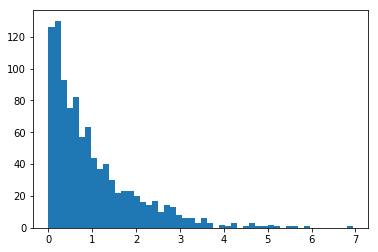

In [10]:
plt.hist(exponential, bins=50)

mean = 1.002405887563773


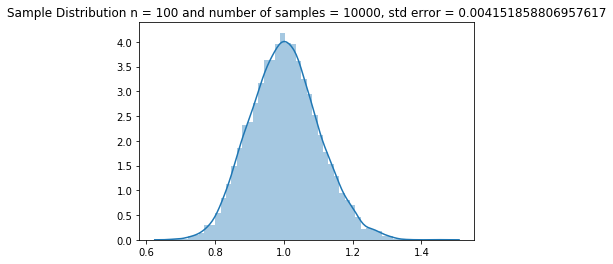

In [11]:
central_limit_theorem_plotter(exponential, 100, 10000)

### Standard Error of the Mean

The standard error of the mean is the standard deviation of the sampling distribution.

**Population sigma**
### $\sigma _{x} = \frac{\sigma }{\sqrt{n}}$

* $ \sigma _{x}$ = standard error of $\bar{x} $
* $ \sigma $ = standard deviation of population

**What if we do not know the population sigma?**<br>
If we do not know the population standard deviation, we can approximate for it by used the sample standard deviation.

### $\sigma _{x} ≈ \frac{s}{\sqrt{n}}$

* s = sample standard deviation

### Confidence Intervals

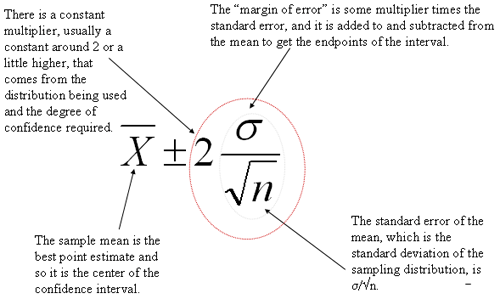

- Point estimate (Statistic) +/- margin of error

**KEY POINT** : Our level of confidence that if we obtained a sample of equal size, our sample interval would contain the population mean.

**IT IS NOT** : The probability that the population mean lies within our sample interval. <-- this implies that there is an element of probability related to having the population mean within our sample. It either is or it is not.

#### Example 1:
Let's construct an 80% and 95% confidence interval for one of our samples: 



In [19]:
# 80%
import scipy.stats as scs
sample = np.random.choice(trip_durations, size=200)
sample_size = 200
sample_mean = sample.mean()
z_critical_upper = scs.norm.ppf(0.9)
print(z_critical_upper)
# z_critical_lower = scs.norm.ppf(0.025)
margin_of_error = z_critical_upper * (pop_std/(sample_size**0.5))
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)
confidence_interval

1.2815515655446004


(17.612194613875598, 25.13697205279107)

In [17]:
# 95%
sample_size = 200
sample_mean = sample.mean()
z_critical_upper = scs.norm.ppf(0.975)
# z_critical_lower = scs.norm.ppf(0.025)
margin_of_error = z_critical_upper * (pop_std/(sample_size**0.5))
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)
confidence_interval

(13.941839667944214, 25.449993665389115)

#### Example 2:
The EPA considers indoor radon levels above 4 picocuries per liter (pCi/L) of air to be high enough to warrant amelioration efforts.  Tests in a sample of 200 Centre County Pennsylvania homes found 127 (63.5%) of these sampled households to have indoor radon levels above 4 pCi/L.  What is the population value being estimated by this sample percentage? What is the standard error of the corresponding sample proportion? What is the 95% confidence interval?"

In [18]:
p = 0.635
std_error = (p*(1-p))/(200**0.5)

critical_value = scs.norm.ppf(0.975)
margin_of_error = critical_value*std_error
confidence_interval = (p - margin_of_error, p + margin_of_error)
print(confidence_interval)

(0.6028782141111354, 0.6671217858888646)


## Student's T Distribution

![imgguiness](./img/guiness.png)

We can use the normal distribution when either:
* the population standard deviation is known
* the sample size is greater than 100.

If **neither** of those hold true, we need to use the **T-distribution**. The t-distribution is wider and has different critical values for different sample sizes.


PDF of T-distribution: ${\frac {\Gamma \left({\frac {\nu +1}{2}}\right)}{{\sqrt {\nu \pi }}\,\Gamma \left({\frac {\nu }{2}}\right)}}\left(1+{\frac {x^{2}}{\nu }}\right)^{-{\frac {\nu +1}{2}}}\!$

parameter: $\nu > 0$ where $\nu$ is degrees of freedom (n-1)

**T distribution becomes closer to Z distribuution as n increases**
![zvt](./img/z_vs_t.png)

#### T-Distribution Example

1. You are inspecting a hardware factory and want to construct a 90% confidence interval of acceptable screw lengths. You draw a sample of 30 screws and calculate their mean length as 4.8 centimeters and the standard deviation as 0.4 centimeters. What are the bounds of your confidence interval?



In [ ]:
import scipy.stats as scs
n = 30
mean = 4.8
t_value = scs.t.ppf(0.95, n-1)
margin_error = t_value * 0.4/(n**0.5)
confidence_interval = (mean - margin_error, mean + margin_error)

In [ ]:
confidence_interval

### Task

Collect the formulas for the various probability distributions we reviewed earlier. <br>
Create data based on a distribution.<br>
Demonstrate the CLT.
